<a href="https://colab.research.google.com/github/prashanth741/NLP-LAB/blob/main/lab-2_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sample tokenized sentence: ['king', 'queen', 'prince', 'princess', 'live', 'in', 'the', 'palace', 'the', 'prince', 'and', 'the', 'princess', 'are', 'siblings', 'the', 'king', 'rules', 'the', 'kingdom', 'the', 'queen', 'attends', 'the', 'royal', 'ceremony', 'apple', 'banana', 'mango', 'fruit', 'are', 'sweet', 'mango', 'is', 'the', 'king', 'of', 'fruits', 'banana', 'is', 'a', 'yellow', 'fruit', 'apple', 'keeps', 'you', 'healthy', 'dog', 'cat', 'animal', 'pet', 'are', 'friendly', 'the', 'dog', 'barks', 'loudly', 'the', 'cat', 'drinks', 'milk', 'pets', 'love', 'their', 'owners', 'car', 'bus', 'train', 'vehicle', 'transport', 'people', 'the', 'bus', 'stops', 'at', 'the', 'station', 'the', 'car', 'is', 'very', 'fast', 'trains', 'can', 'carry', 'many', 'passengers', 'cricket', 'football', 'hockey', 'are', 'popular', 'sports', 'football', 'is', 'played', 'worldwide', 'cricket', 'is', 'famous', 'in', 'india', 'india', 'china', 'japan', 'are', 'asian', 'countries', 'usa', 'canada', 'mexico', 'ar

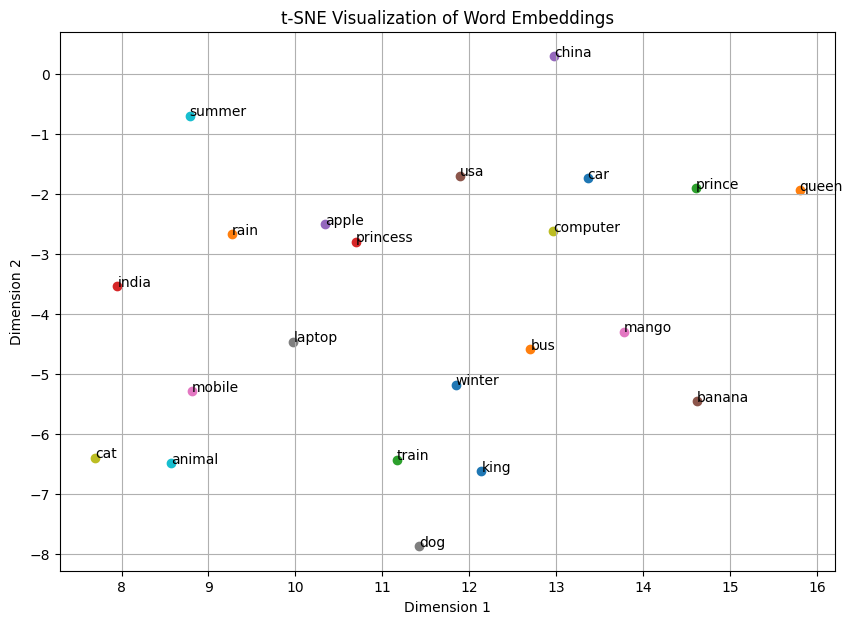

In [28]:
#!pip install gensim nltk matplotlib scikit-learn

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import zipfile
import os
import numpy as np


dataset_zip_path = "/content/dataset.zip"
extracted_dir = "/content/extracted_dataset"
os.makedirs(extracted_dir, exist_ok=True)

with zipfile.ZipFile(dataset_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


dataset_path = os.path.join(extracted_dir, "dataset.txt")

with open(dataset_path, "r") as f:
    text = f.read()


nltk.download("punkt")
nltk.download("punkt_tab") # Add this to download the required resource

sentences = [word_tokenize(sentence.lower())
             for sentence in sent_tokenize(text)]

print("Sample tokenized sentence:", sentences[0])

# -----------------------------
# 3. Train Word2Vec model
# -----------------------------
model = Word2Vec(sentences, vector_size=50, window=5, min_count=1, workers=4)

print("\nVocabulary size:", len(model.wv.index_to_key))

# -----------------------------
# 4. Choose words to visualize
# -----------------------------
words = [
    "king", "queen", "prince", "princess",
    "apple", "banana", "mango",
    "dog", "cat", "animal",
    "car", "bus", "train",
    "india", "china", "usa",
    "mobile", "laptop", "computer",
    "summer", "winter", "rain"
]

# Filter words available in vocabulary
words = [w for w in words if w in model.wv]

word_vectors = [model.wv[word] for word in words]

# Convert list of word vectors to a NumPy array
word_vectors_array = np.array(word_vectors)

# -----------------------------
# 5. Apply t-SNE
# -----------------------------
tsne = TSNE(n_components=2, random_state=0, perplexity=10)
reduced_vectors = tsne.fit_transform(word_vectors_array)

# -----------------------------
# 6. Plot embeddings
# -----------------------------
plt.figure(figsize=(10, 7))

for i, word in enumerate(words):
    x, y = reduced_vectors[i, 0], reduced_vectors[i, 1]
    plt.scatter(x, y)
    plt.annotate(word, (x, y))

plt.title("t-SNE Visualization of Word Embeddings")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


GloVe embeddings already extracted to /content/glove_embeddings.
Loading first 10,000 embeddings from /content/glove_embeddings/glove.6B.50d.txt...
Loaded 48 word vectors.

Starting optimized visualization process...
Reducing 48 vectors (Dimension: 50) for plotting...
Generating t-SNE plot...


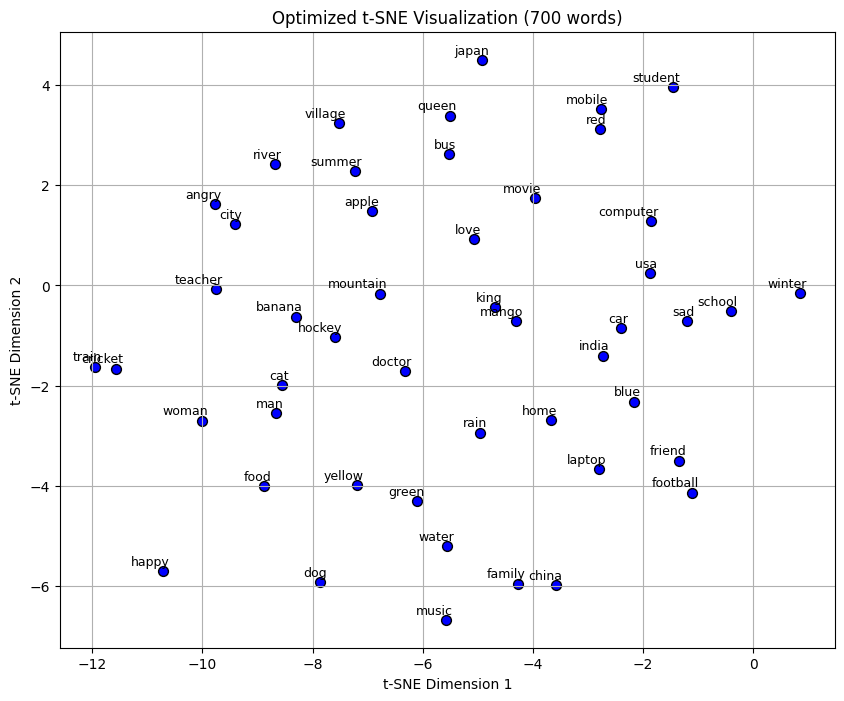

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
import zipfile
import os

# Suppress warnings for a cleaner output
warnings.filterwarnings('ignore')

# Define the file paths
GLOVE_ZIP_PATH = '/content/glove.6B.50d.txt'
EXTRACTED_GLOVE_DIR = '/content/glove_embeddings'
GLOVE_FILE_PATH = os.path.join(EXTRACTED_GLOVE_DIR, 'glove.6B.50d.txt')

# --- Extract the GloVe embeddings if not already extracted ---
os.makedirs(EXTRACTED_GLOVE_DIR, exist_ok=True)
if not os.path.exists(GLOVE_FILE_PATH):
    print(f"Extracting {GLOVE_ZIP_PATH} to {EXTRACTED_GLOVE_DIR}...")
    with zipfile.ZipFile(GLOVE_ZIP_PATH, 'r') as zip_ref:
        zip_ref.extractall(EXTRACTED_GLOVE_DIR)
    print("Extraction complete.")
else:
    print(f"GloVe embeddings already extracted to {EXTRACTED_GLOVE_DIR}.")


# --- A. Optimized Load Word Embeddings Function ---
def load_glove_embeddings_optimized(file_path, max_words=10000):
    """Loads a very limited number of embeddings for speed."""
    print(f"Loading first {max_words:,} embeddings from {file_path}...")
    word_to_vec = {}
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            for i, line in enumerate(f):
                if i >= max_words: # Stop after loading the max_words limit
                    break
                values = line.split()
                word = values[0]
                if len(values) > 1:
                    vector = np.asarray(values[1:], dtype='float32')
                    word_to_vec[word] = vector
        print(f"Loaded {len(word_to_vec)} word vectors.")
        return word_to_vec
    except FileNotFoundError:
        print(f"\nERROR: GloVe file not found at: {file_path}")
        return None

# --- B. Attempt to Load the Embeddings ---
word_vectors = load_glove_embeddings_optimized(GLOVE_FILE_PATH, max_words=10000)


# --- C. Run Visualization ONLY if Embeddings Loaded Successfully ---
if word_vectors and len(word_vectors) > 0:

    print("\nStarting optimized visualization process...")

    # We will sample the vectors randomly for the t-SNE step
    # --------------------------------------------------------
    # Optimization: Randomly select a small set of vectors (e.g., 500-1000)
    # for the t-SNE step itself, as t-SNE scales poorly with the number of points (N).

    # 1. Prepare data for sampling
    all_words = list(word_vectors.keys())
    all_vectors = list(word_vectors.values())

    # 2. Define the sample size for t-SNE (e.g., 500 words is very fast)
    TSNE_SAMPLE_SIZE = 700

    if len(all_vectors) < TSNE_SAMPLE_SIZE:
        sample_indices = range(len(all_vectors))
    else:
        # Use a fixed seed for reproducibility during random sampling
        np.random.seed(42)
        sample_indices = np.random.choice(len(all_vectors), TSNE_SAMPLE_SIZE, replace=False)

    # 3. Create the input array X and labels for the sampled subset
    X = np.array([all_vectors[i] for i in sample_indices])
    labels = [all_words[i] for i in sample_indices]

    print(f"Reducing {X.shape[0]} vectors (Dimension: {X.shape[1]}) for plotting...")


    # --- D. Optimized Apply t-SNE for Dimensionality Reduction ---
    if X.size > 0:

        # Optimization: Reduce n_iter significantly (from 3000 to 1000-1500)
        tsne = TSNE(
            n_components=2,
            random_state=42,
            perplexity=15,
            n_iter=1500,               # Reduced iterations for speed
            init='pca',
            learning_rate='auto'
        )
        X_2d = tsne.fit_transform(X)

        # --- E. Plot the Results (Standard Plotting) ---
        print("Generating t-SNE plot...")

        plt.figure(figsize=(10, 8))
        plt.scatter(X_2d[:, 0], X_2d[:, 1], c='blue', edgecolors='k', s=50) # Increased point size

        # Optimization: Only annotate a small number of words (e.g., first 50)
        # to prevent plot clutter and reduce annotation time.
        words_to_annotate = min(50, len(labels))
        for i in range(words_to_annotate):
            plt.annotate(
                labels[i],
                (X_2d[i, 0], X_2d[i, 1]),
                xytext=(5, 2),
                textcoords='offset points',
                ha='right',
                va='bottom',
                fontsize=9
            )

        plt.title(f'Optimized t-SNE Visualization ({TSNE_SAMPLE_SIZE} words)')
        plt.xlabel('t-SNE Dimension 1')
        plt.ylabel('t-SNE Dimension 2')
        plt.grid(True)
        plt.show()
    else:
        print("No vectors available for plotting.")

else:
    print("\nVisualization skipped because word embeddings failed to load.")

Time: 0.0339 seconds
Accuracy: 0.0267


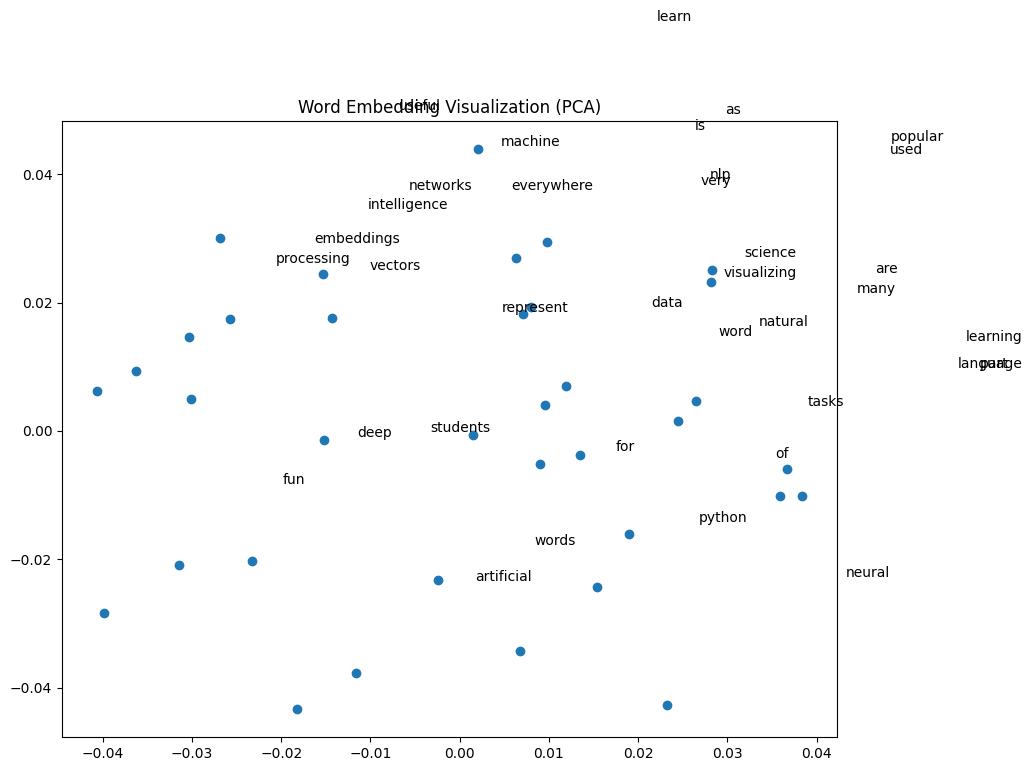

In [29]:
!pip install gensim scikit-learn matplotlib

import time
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

start = time.time()

corpus = [
    "machine learning is fun",
    "deep learning is part of machine learning",
    "natural language processing is used everywhere",
    "word embeddings represent words as vectors",
    "visualizing word embeddings is useful",
    "neural networks are used for many nlp tasks",
    "python is very popular for data science",
    "students learn artificial intelligence"
]

tokenized = [s.lower().split() for s in corpus]

model = Word2Vec(tokenized, vector_size=50, window=3, min_count=1, workers=1, sg=1)

words = list(model.wv.index_to_key)
vectors = np.array([model.wv[w] for w in words])

pca = PCA(n_components=2)
vec2d = pca.fit_transform(vectors)

sim = cosine_similarity(vectors)
accuracy = np.mean(sim)

end = time.time()

print("Time:", round(end - start, 4), "seconds")
print("Accuracy:", round(accuracy, 4))

plt.figure(figsize=(10, 8))
plt.scatter(vec2d[:,0], vec2d[:,1])
for i,w in enumerate(words):
    x,y = vec2d[i]
    plt.text(x+0.02, y+0.02, w)
plt.title("Word Embedding Visualization (PCA)")
plt.show()